<a href="https://colab.research.google.com/github/bon-u/S1Project/blob/main/AI07_S1P_%EA%B5%AC%EB%B3%B8%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/vgames2.csv',index_col = 0)
df['NA_Sales']=df['NA_Sales'].replace({'K':'*1e-3','M':''},regex=True).map(pd.eval).astype(float)
df['EU_Sales']=df['EU_Sales'].replace({'K':'*1e-3','M':''},regex=True).map(pd.eval).astype(float)
df['JP_Sales']=df['JP_Sales'].replace({'K':'*1e-3','M':''},regex=True).map(pd.eval).astype(float)
df['Other_Sales']=df['Other_Sales'].replace({'K':'*1e-3','M':''},regex=True).map(pd.eval).astype(float)
df
#출고량 단위를 맞추고 숫자형으로 만들어줌

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
dfg=df.drop(['Name','Platform','Year','Publisher'],axis=1)
dfg=dfg.dropna(axis=0)
gen=dfg.groupby(dfg['Genre']).mean() 
#지역별 장르의 출고량 평균 데이터 프레임을 생성
print(gen)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        0.264693  0.157991  0.047776     0.056415
Adventure     0.082547  0.050039  0.040586     0.013133
Fighting      0.263518  0.119504  0.103117     0.043259
Misc          0.235323  0.122468  0.060709     0.042699
Platform      0.505023  0.228066  0.147794     0.058292
Puzzle        0.213408  0.087768  0.098391     0.021661
Racing        0.287361  0.190748  0.045374     0.062027
Role-Playing  0.215469  0.123790  0.232603     0.038409
Shooter       0.444893  0.239335  0.029266     0.078479
Simulation    0.211514  0.131040  0.073642     0.036393
Sports        0.290696  0.160820  0.057826     0.057527
Strategy      0.101029  0.066647  0.072735     0.016706


In [4]:
from scipy import stats
pv1=stats.normaltest(gen, axis=0).pvalue
print(pv1)
from scipy.stats import chi2_contingency
chip1=chi2_contingency(gen,correction=False)[1]
print(chip1)

[0.37825939 0.8497086  0.00231485 0.89910334]
1.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


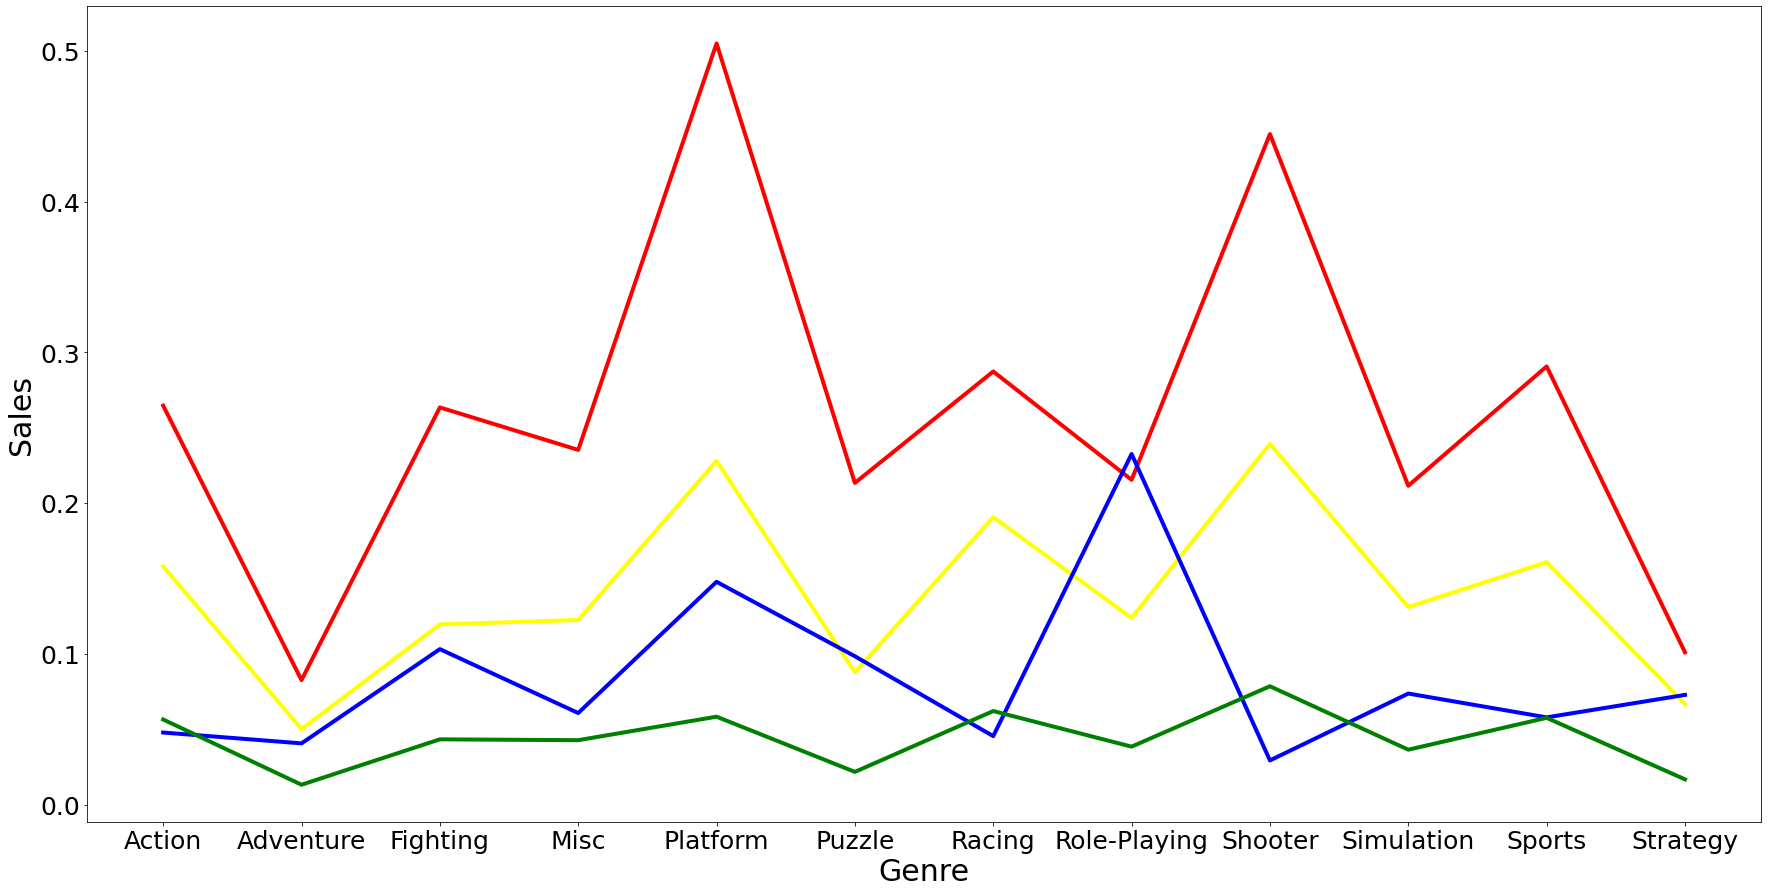

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.plot(gen.index,gen.NA_Sales,color='red',linewidth=4,label='NA')
plt.plot(gen.index,gen.EU_Sales,color='yellow',linewidth=4,label='EU')
plt.plot(gen.index,gen.JP_Sales,color='blue',linewidth=4,label='JP')
plt.plot(gen.index,gen.Other_Sales,color='green',linewidth=4,label='Other')

plt.xlabel('Genre',fontsize=30)
plt.ylabel('Sales',fontsize=30)
plt.xticks(gen.index)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
plt.show()

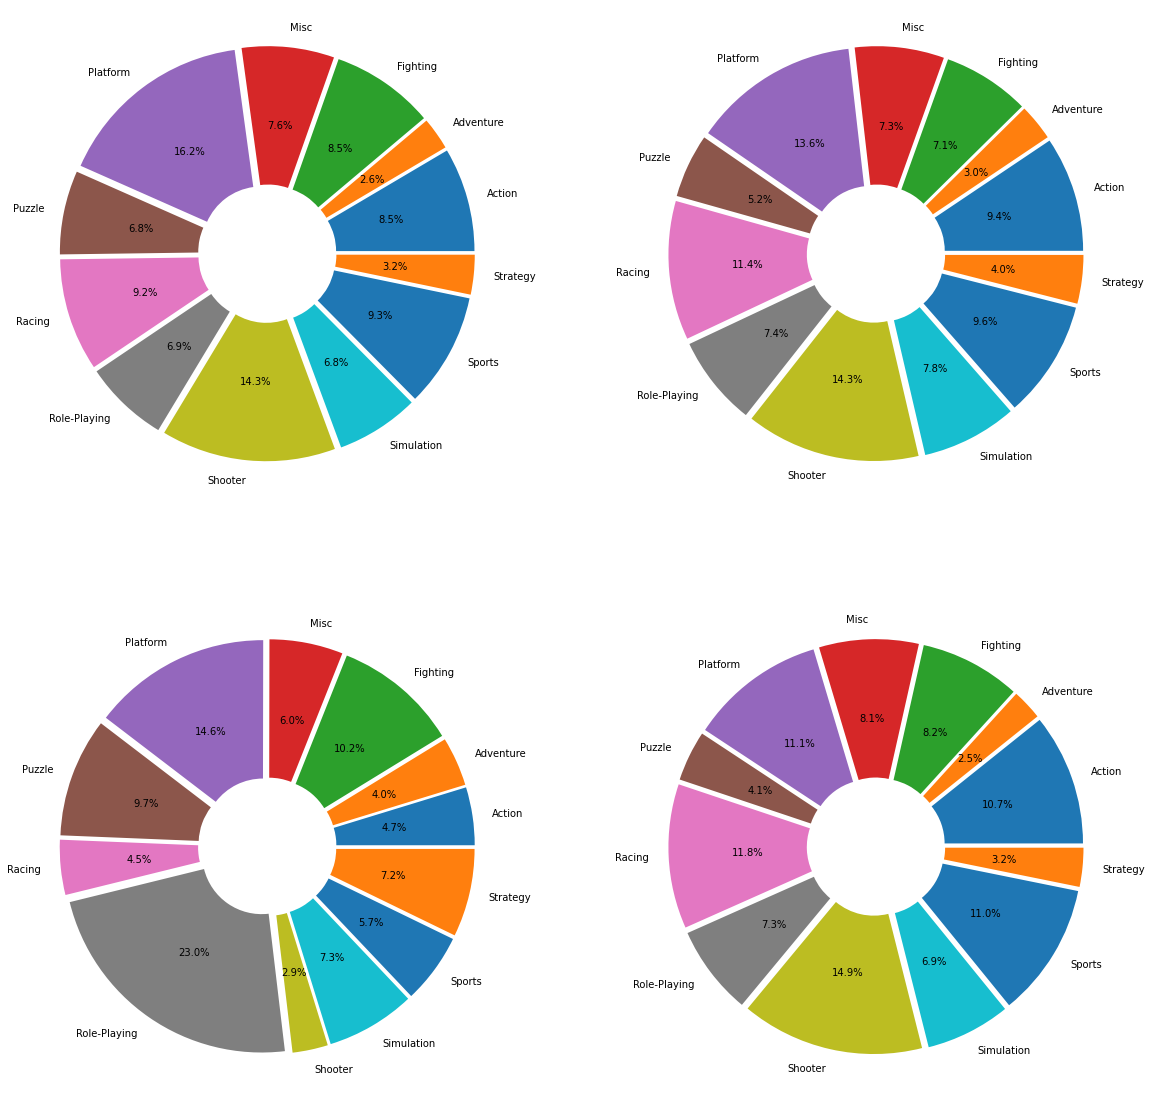

In [7]:
go=gen['Other_Sales']*10
expl=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.pie(gen.NA_Sales,labels=gen.index,explode=expl,autopct='%.1f%%',wedgeprops={'width':0.7})
plt.subplot(222)
plt.pie(gen.EU_Sales,labels=gen.index,explode=expl,autopct='%.1f%%',wedgeprops={'width':0.7})
plt.subplot(223)
plt.pie(gen.JP_Sales,labels=gen.index,explode=expl,autopct='%.1f%%',wedgeprops={'width':0.7})
plt.subplot(224)
plt.pie(go,labels=go.index,explode=expl,autopct='%.1f%%',wedgeprops={'width':0.7})
plt.show()

In [8]:
print('지역별 장르 순위 TOP 3')
for i in range(0,gen.shape[1]):
  na=gen.sort_values(by=gen.columns[i],ascending=False)
  print(gen.columns[i])
  print('1위:',na.index[0],'2위:',na.index[1],'3위:',na.index[2])
#지역별 장르의 출고량 평균을 기준으로 높은 순서대로 순위 지정

지역별 장르 순위 TOP 3
NA_Sales
1위: Platform 2위: Shooter 3위: Sports
EU_Sales
1위: Shooter 2위: Platform 3위: Racing
JP_Sales
1위: Role-Playing 2위: Platform 3위: Fighting
Other_Sales
1위: Shooter 2위: Racing 3위: Platform


In [9]:
dfy=df.drop(['Name'],axis=1)
dfy['Sales']=dfy['NA_Sales']+dfy['EU_Sales']+dfy['JP_Sales']+dfy['Other_Sales']
dfy=dfy.dropna(axis=0)
for i in range(0,dfy.shape[0]):
  if dfy.iloc[i,1]<=22:
    dfy.iloc[i,1]=dfy.iloc[i,1]+2000
  elif dfy.iloc[i,1]<100:
    dfy.iloc[i,1]=dfy.iloc[i,1]+1900
  else:
    dfy.iloc[i,1]=dfy.iloc[i,1]
dfy
#연도의 표현을 맞춰주고 지역별 출고량을 합한 Sales 컬럼을 만듬

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
1,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16594,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [10]:
dfyr=dfy[['Year','Genre','Sales']]
dfyr

,Year,Genre,Sales
1,2008.0,Action,0.04
2,2009.0,Action,0.18
3,2010.0,Adventure,0.02
4,2010.0,Misc,0.04
5,2010.0,Platform,0.25
...,...,...,...
16594,2006.0,Platform,0.20
16595,2005.0,Action,0.01
16596,2015.0,Sports,0.79
16597,2013.0,Action,0.38


In [11]:
dfp=dfy.pivot_table(index = 'Genre', columns = 'Year', values = 'Sales',aggfunc='mean')
dfp=dfp.fillna(0)
dfp
#피벗테이블을 사용해 연도별 각 장르의 평균 출고량을 구함

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0.340,0.591600,0.361111,0.408571,1.850000,1.7600,2.2900,0.5550,0.8700,2.325000,2.130000,1.352000,3.840000,0.301667,0.387500,0.447500,1.030000,0.890000,0.895682,0.708205,0.788140,0.858788,0.693200,0.472083,0.609200,0.445417,0.361359,0.504714,0.618539,0.510406,0.519912,0.497908,0.459240,0.846014,0.532312,0.269763,0.168136,0.01,0.00
Adventure,0.000,0.000000,0.000000,0.400000,0.000000,0.0000,0.0000,4.3800,0.0000,0.000000,0.000000,1.120000,3.060000,0.070000,0.935000,0.054615,0.245882,0.355000,0.393043,0.400526,0.185000,0.448000,0.270000,0.176667,0.222368,0.203095,0.161690,0.290952,0.150060,0.146596,0.108301,0.148411,0.103509,0.110167,0.081200,0.151132,0.054242,0.00,0.00
Fighting,0.770,0.000000,0.000000,0.000000,0.000000,1.0500,0.0000,2.7100,0.0000,0.000000,0.000000,0.390000,2.175714,0.795455,0.385000,0.511724,0.601333,0.421429,0.772683,0.596250,0.698621,1.005556,0.461481,0.540682,0.429744,0.457674,0.409636,0.352600,0.621228,0.607170,0.372000,0.451224,0.328621,0.361500,0.702174,0.370476,0.275000,0.00,0.00
Misc,0.675,0.000000,0.870000,2.140000,1.450000,0.0000,0.0000,0.0000,0.0000,1.280000,0.000000,0.080000,2.470000,0.100000,0.476667,0.290455,0.463478,0.473333,0.563810,0.827200,0.777500,0.630385,0.347333,0.448868,0.389552,0.542636,0.616789,0.607133,0.410381,0.371498,0.442000,0.304754,0.603421,0.610952,0.578780,0.298974,0.063889,0.00,0.00
Platform,0.000,2.306667,1.006000,1.386000,0.690000,10.7925,1.5650,0.8700,6.9325,6.886667,7.660000,1.271667,2.235000,1.698182,2.614545,1.283846,2.016429,1.214444,1.193200,1.155556,0.668750,0.914651,0.596753,0.492184,0.717273,0.278171,0.920370,0.845952,0.575000,1.462500,1.031613,0.760000,1.685455,0.678108,0.887000,0.432143,0.208000,0.00,0.00
Puzzle,0.000,1.125000,3.346667,0.780000,1.046667,0.8025,0.0000,0.0000,5.5800,7.550000,2.995000,0.810000,0.968000,1.056667,0.510000,0.224167,0.435556,0.419286,0.488462,0.223333,0.319167,0.529333,0.266500,0.244286,0.336400,0.633125,0.256905,0.365846,0.242656,0.256709,0.247778,0.118605,0.158182,0.333333,0.214286,0.115000,0.000000,0.00,0.00
Racing,0.000,0.480000,0.785000,0.000000,1.983333,0.0000,1.9600,0.0000,2.1400,0.000000,3.125000,1.140000,4.525000,0.180000,0.272500,0.507500,1.326190,0.886667,0.557917,0.758980,0.465116,0.786338,0.292718,0.478716,0.651571,0.732468,0.454133,0.463690,0.862561,0.410723,0.612807,0.546250,0.481000,0.813750,0.618889,0.416842,0.083500,0.00,0.00
Role-Playing,0.000,0.000000,0.000000,0.000000,0.000000,0.0000,2.5200,1.5500,1.9600,1.100000,2.260000,0.652000,1.372000,0.621111,0.419412,0.594583,1.571071,0.948696,1.080385,1.476250,1.001379,0.537073,0.835000,0.631042,0.899167,0.401549,0.479537,0.425825,0.532946,0.465631,0.685049,0.561263,0.612436,0.436286,0.509778,0.467051,0.168750,0.02,0.00
Shooter,3.535,1.002000,0.762000,0.490000,10.366667,1.0000,0.9725,0.3450,0.5100,1.190000,0.000000,0.663333,0.093333,1.540000,0.754545,0.143103,0.300000,0.820741,0.426087,0.764375,0.341500,0.689167,0.610769,0.371233,0.533182,0.433021,0.555797,0.843810,0.716988,0.767473,0.956049,1.056915,1.517500,1.063220,1.404043,1.944706,0.567812,0.00,0.00


In [12]:
pv2=stats.normaltest(dfp, axis=0).pvalue
print(pv2)
dfp2=dfp[[1998,1999]]
chip2=chi2_contingency(dfp2,correction=False)[1]
print(chip2)

[7.76084710e-07 3.13562357e-03 2.69147884e-05 1.38991153e-02
 3.77697396e-06 3.87248494e-07 5.92003989e-02 3.88442444e-03
 2.11443615e-02 1.82703594e-02 1.27769261e-03 3.10264479e-01
 8.20684494e-01 2.32793360e-01 9.76103052e-07 6.79989948e-04
 2.21808672e-01 5.27749969e-01 4.63835069e-01 1.31991805e-01
 8.03161162e-01 7.08727456e-01 5.05584207e-01 6.13464408e-01
 8.29625798e-01 1.53406948e-03 4.59618265e-01 8.59308247e-01
 9.49166984e-01 2.73072850e-03 5.20042168e-01 2.05373092e-01
 5.56816278e-02 9.01208198e-01 2.76986965e-01 2.51165853e-06
 4.15304500e-02 3.26076321e-05 4.93772585e-08]
0.9999978013316856


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


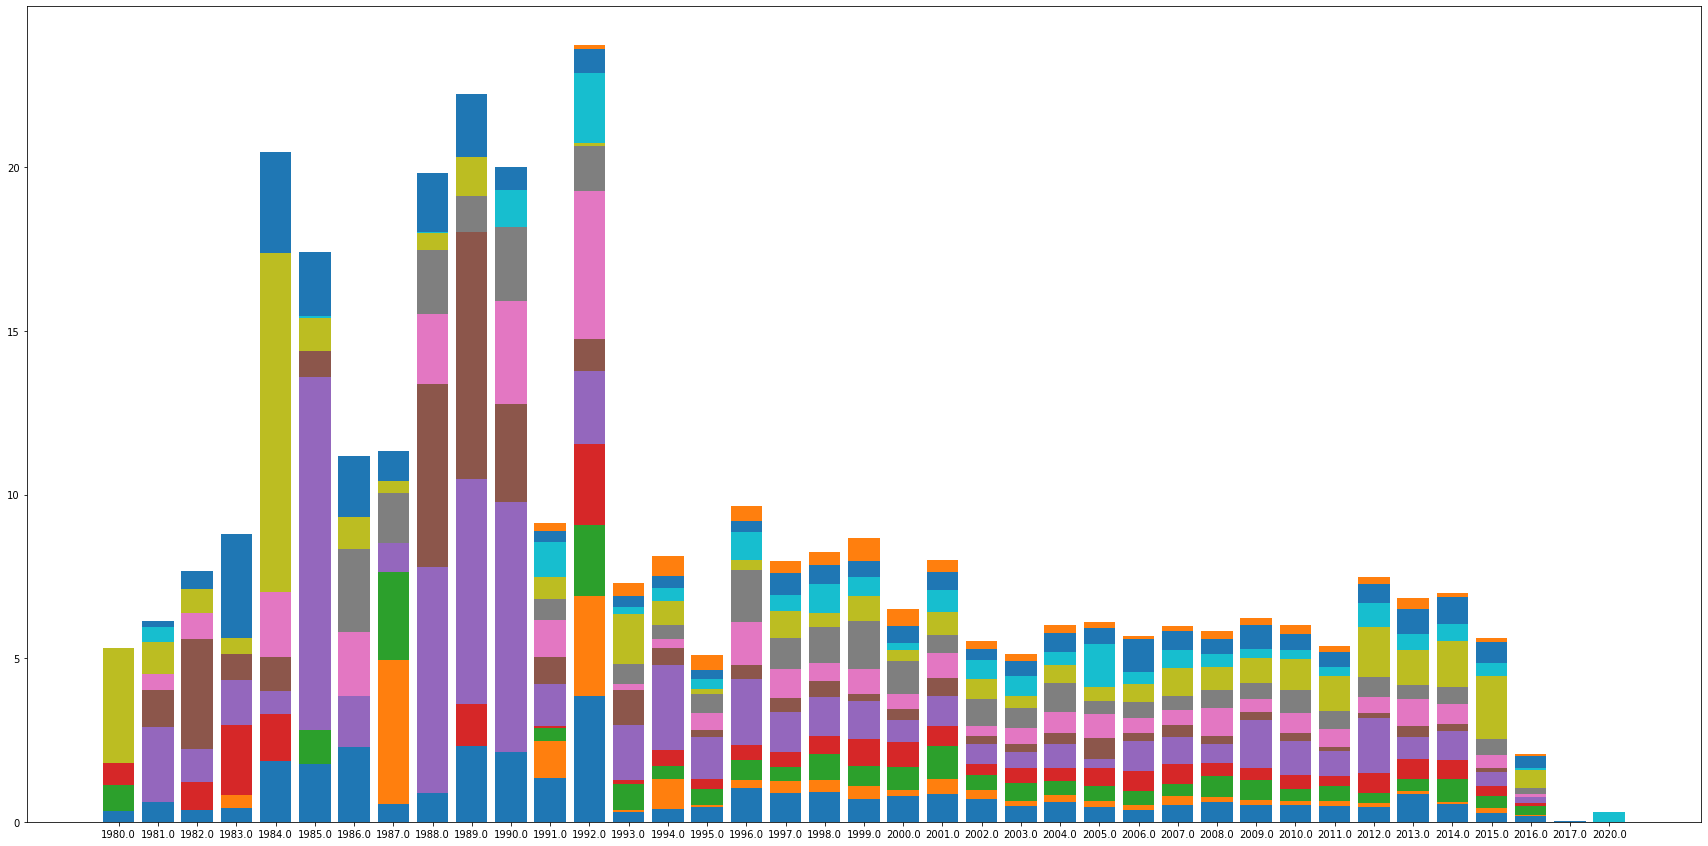

In [13]:
import numpy as np
label=dfp.index
index=np.arange(dfp.shape[1])
plt.figure(figsize=(30,15))
plt.bar(index,dfp.iloc[0,:])
bot=dfp.iloc[0,:]
for i in range(1,dfp.shape[0]):
  plt.bar(index,dfp.iloc[i,:],bottom=bot)
  bot=bot+dfp.iloc[i,:]
plt.xticks(index,dfp.columns)
plt.show()

In [14]:
for y in range(0,dfp.shape[1]):
  dfs=dfp.sort_values(by=dfp.columns[y],ascending=False)
  print(dfp.columns[y],'년도 1위:',dfs.index[0],'2위:',dfs.index[1],'3위:',dfs.index[2])

1980.0 년도 1위: Shooter 2위: Fighting 3위: Misc
1981.0 년도 1위: Platform 2위: Puzzle 3위: Shooter
1982.0 년도 1위: Puzzle 2위: Platform 3위: Misc
1983.0 년도 1위: Sports 2위: Misc 3위: Platform
1984.0 년도 1위: Shooter 2위: Sports 3위: Racing
1985.0 년도 1위: Platform 2위: Sports 3위: Action
1986.0 년도 1위: Role-Playing 2위: Action 3위: Racing
1987.0 년도 1위: Adventure 2위: Fighting 3위: Role-Playing
1988.0 년도 1위: Platform 2위: Puzzle 3위: Racing
1989.0 년도 1위: Puzzle 2위: Platform 3위: Action
1990.0 년도 1위: Platform 2위: Racing 3위: Puzzle
1991.0 년도 1위: Action 2위: Platform 3위: Racing
1992.0 년도 1위: Racing 2위: Action 3위: Adventure
1993.0 년도 1위: Platform 2위: Shooter 3위: Puzzle
1994.0 년도 1위: Platform 2위: Adventure 3위: Shooter
1995.0 년도 1위: Platform 2위: Role-Playing 3위: Fighting
1996.0 년도 1위: Platform 2위: Role-Playing 3위: Racing
1997.0 년도 1위: Platform 2위: Role-Playing 3위: Action
1998.0 년도 1위: Platform 2위: Role-Playing 3위: Action
1999.0 년도 1위: Role-Playing 2위: Platform 3위: Misc
2000.0 년도 1위: Role-Playing 2위: Action 3위: Misc
2001.0 년도

In [15]:
dfn=dfy.sort_values(by='Sales',ascending=False)
dfn.head(10)
#각 게임의 출고량을 합하고 출고량이 높은순서대로 정렬함

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
2909,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1204,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6938,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10489,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [16]:
pub=dfn[['Genre','Publisher','Sales']]
pub=pub.dropna(axis=0)
pub
#Publisher와 Genre에 따른 출고량을 보기위해 데이터를 정리

,Genre,Publisher,Sales
2909,Sports,Nintendo,82.74
4200,Platform,Nintendo,40.24
12580,Racing,Nintendo,35.83
3353,Sports,Nintendo,33.00
7830,Role-Playing,Nintendo,31.38
...,...,...,...
10632,Simulation,Paradox Development,0.01
5003,Strategy,Paradox Interactive,0.01
15861,Role-Playing,Hudson Entertainment,0.01
13768,Adventure,D3Publisher,0.01


In [17]:
pubg=pub.groupby('Publisher')['Sales'].agg(**{'Sales_Mean':'mean','Count':'count'})
pubg=pubg.sort_values(by='Sales_Mean',ascending=False)
print(pubg.head())
palcom=dfn.loc[dfn['Publisher']=='Palcom']
print('Palcom이 제작한 게임의 갯수 :',palcom.shape[0])
#팔콤 회사의 게임 갯수
#게임별 매출 평균이 가장높은 회사를 뽑았으나 닌텐도 이외에는 게임의 갯수가 적어 분석에 적합하지 않음을 확인

                     Sales_Mean  Count
Publisher                             
Palcom                 4.170000      1
Red Orb                2.625000      2
Nintendo               2.542746    692
Arena Entertainment    2.360000      2
UEP Systems            2.260000      1
Palcom이 제작한 게임의 갯수 : 1


In [18]:
pub100=dfn
for i in range(0,pubg.shape[0]):
  if pubg.iloc[i,1] < 100:
    ind=pub100[pub100['Publisher']==pubg.index[i]].index
    pub100=pub100.drop(ind,axis=0)
pub100
p100=pub100[['Genre','Publisher','Sales']]
p100
#게임을 100개 이상 만든 회사만 남겨둠

,Genre,Publisher,Sales
2909,Sports,Nintendo,82.74
4200,Platform,Nintendo,40.24
12580,Racing,Nintendo,35.83
3353,Sports,Nintendo,33.00
7830,Role-Playing,Nintendo,31.38
...,...,...,...
1881,Shooter,Eidos Interactive,0.01
14659,Shooter,Activision,0.01
8718,Sports,Electronic Arts,0.01
13768,Adventure,D3Publisher,0.01


In [19]:
g_p=pub100.pivot_table(index = 'Genre', columns = 'Publisher', values = 'Sales',aggfunc='mean')
g_p=g_p.fillna(0)
print(stats.normaltest(g_p, axis=0).pvalue)
print(chi2_contingency(g_p,correction=False)[1])
g_p['mean']=g_p.mean(axis=1)
g_p=g_p.sort_values(by='mean',ascending=False)
g_p

[5.05944540e-02 9.58928660e-01 2.25076345e-03 2.50828235e-02
 5.10015348e-01 6.90775615e-01 5.65074062e-01 1.07020309e-05
 6.93900175e-01 2.37719842e-01 5.93420499e-01 2.95881433e-01
 2.68420960e-01 4.44216407e-04 5.50481201e-01 8.08482955e-01
 4.28544663e-01 3.17858240e-02 4.17535831e-05 5.92387867e-01
 1.62563600e-01 7.58990313e-04 1.46448799e-03 8.05403063e-02
 2.05895794e-01 3.96746669e-02 2.57077845e-01 6.89272109e-01]
1.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


Publisher,505 Games,Acclaim Entertainment,Activision,Atari,Capcom,Codemasters,D3Publisher,Deep Silver,Disney Interactive Studios,Eidos Interactive,Electronic Arts,Idea Factory,Konami Digital Entertainment,Microsoft Game Studios,Midway Games,Namco Bandai Games,Nintendo,Nippon Ichi Software,Sega,Sony Computer Entertainment,Square Enix,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing,mean
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Shooter,0.307778,0.378235,1.916883,0.502632,0.463333,0.241000,0.250909,0.108000,0.090000,0.229143,1.141159,0.000000,0.236000,3.408571,0.337500,0.273056,2.902500,0.010000,0.415250,1.129020,0.462500,0.414167,0.848906,0.100000,0.734565,0.386897,0.370000,0.073750,0.633277
Racing,0.030000,0.334091,0.231644,0.340000,0.183077,0.395747,0.106667,0.087143,0.651429,0.285000,0.908481,0.000000,0.099231,1.505000,0.261200,0.259259,4.173056,0.000000,0.455208,1.700923,0.000000,0.400300,1.062500,0.088000,0.304038,0.807143,0.330000,0.124615,0.540134
Role-Playing,0.118000,0.260000,1.141220,0.286786,0.887778,0.123333,0.170000,0.175294,0.493333,0.390000,1.008286,0.056667,0.370541,1.285625,0.277500,0.356225,2.597885,0.150882,0.229687,0.898571,0.717087,0.142500,1.011667,0.144894,0.417750,1.050000,0.000000,0.000000,0.527197
Action,0.152857,0.109286,0.458046,0.489184,0.552662,0.158889,0.184717,0.511923,0.543617,0.781481,0.635635,0.022857,0.486573,0.592381,0.271852,0.149224,1.642949,0.102308,0.304947,1.034719,0.564902,0.460777,2.285109,0.211898,0.744115,0.270930,0.711133,0.098750,0.519061
Fighting,0.081818,0.541290,0.407143,0.700541,0.575965,0.000000,0.083333,0.095000,0.000000,0.394286,0.812895,0.000000,0.086500,0.492000,0.658800,0.456541,2.962778,0.320000,0.396216,0.938333,1.063333,1.026056,0.060000,0.317500,0.383889,0.122500,1.245455,0.093333,0.511268
Sports,0.530370,0.345962,0.530071,0.227593,0.156667,0.313000,0.068182,0.203000,0.970000,0.485000,0.845808,0.000000,0.351792,0.860588,0.305088,0.379000,3.963636,0.000000,0.534851,0.483171,0.000000,0.434000,0.508013,0.102564,0.328873,0.055000,0.000000,0.199375,0.470772
Platform,0.093333,0.470000,0.556333,0.353333,0.491739,0.000000,0.201667,0.026667,0.508947,0.342500,0.406250,0.000000,0.370250,0.275000,0.110000,0.152105,3.839189,0.080000,1.169615,1.588923,0.000000,0.488690,0.308182,0.090000,0.303478,0.461892,0.191250,0.170000,0.466048
Misc,0.144839,0.238000,0.742039,0.276154,0.175455,0.241429,0.116875,0.098571,0.563864,0.220000,0.466429,0.030000,0.243919,1.382647,0.479000,0.304536,1.738788,0.376667,0.326129,0.631260,0.260000,0.358333,0.392963,0.025000,0.646358,0.190000,0.256364,0.141667,0.395260
Simulation,0.540976,0.000000,0.360435,0.538889,0.080000,0.146667,0.051667,0.094706,0.178000,0.127500,0.771207,0.000000,0.375349,0.692778,0.000000,0.369643,3.045000,0.000000,0.288333,0.577333,0.342500,0.291852,0.225000,0.162308,0.376068,0.020000,0.000000,0.110000,0.348793


In [20]:
pr=dfy.drop(['Platform','Year','Genre','Sales'],axis=1)
pr=pr.groupby(pr['Publisher']).mean()
pr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
10TACLE Studios,0.023333,0.013333,0.00,0.000000
1C Company,0.003333,0.023333,0.00,0.006667
20th Century Fox Video Games,0.364000,0.020000,0.00,0.002000
2D Boy,0.000000,0.030000,0.00,0.010000
3DO,0.180000,0.084444,0.00,0.017500
...,...,...,...,...
id Software,0.020000,0.000000,0.00,0.000000
imageepoch Inc.,0.000000,0.000000,0.02,0.000000
inXile Entertainment,0.020000,0.060000,0.00,0.010000


In [21]:
pv3=stats.normaltest(pr, axis=0).pvalue
print(pv3)
chip3=chi2_contingency(pr,correction=False)[1]
print(chip3)

[2.84454249e-164 1.70805916e-177 4.13617847e-145 4.38763338e-136]
1.0


,분산 비율,기여율,누적기여율
0,2.230762,0.556721,0.556721
1,1.000942,0.249800,0.806521
2,0.498698,0.124458,0.930979
3,0.276567,0.069021,1.000000


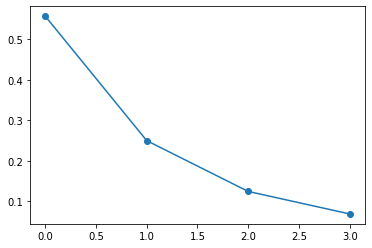

In [22]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
#prd=pr.drop(['Publisher'],axis=1)
#id=pr['Publisher']
#id=id.reset_index(drop=True)
scaler = StandardScaler()
nor=scaler.fit_transform(pr)
pc=PCA(4)
pc.fit(nor)
plt.plot(pc.explained_variance_ratio_,'o-')
result = pd.DataFrame({'분산 비율':pc.explained_variance_,'기여율':pc.explained_variance_ratio_})
result['누적기여율']=result['기여율'].cumsum()
result

Text(0.5, 0, 'PC3')

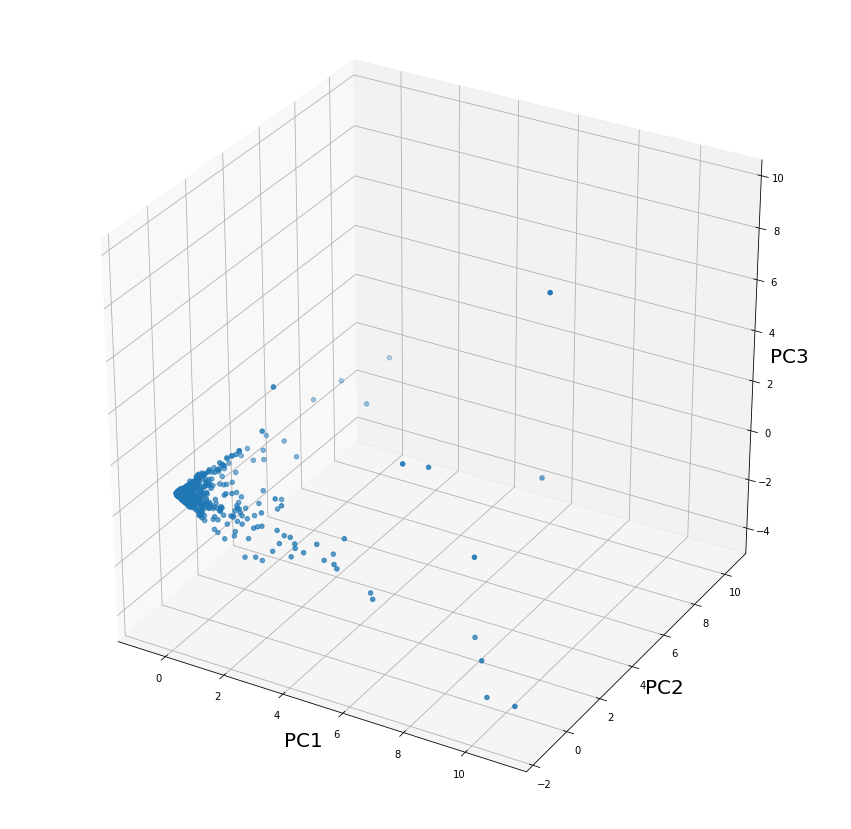

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
pca=PCA(3)
pca.fit(nor)
pj=pca.transform(nor)
data=pd.DataFrame(pj)
data=data.set_index(pr.index)
#dt=pd.concat([id,data],axis=1)
data.columns=['PC1','PC2','PC3']
plt.figure(figsize=(15,15))
test_graph1=plt.figure(1)
test_graph2=test_graph1.add_subplot(111,projection='3d')
test_graph2.scatter(data['PC1'],data['PC2'],data['PC3'])
test_graph2.set_xlabel('PC1',fontsize=20)
test_graph2.set_ylabel('PC2',fontsize=20)
test_graph2.set_zlabel('PC3',fontsize=20)